## AutoGIS Part 2

This series of lessons is about automating Geographic Information Systems (GIS) processes.  It draws directly from the excellent AutoGIS course developed by the University of Helsinki:

https://automating-gis-processes.github.io/site/index.html

## Group Project

We introduce a group project that the class is to complete together over the next week.  The goal of the project is to calculate the number of lane miles of roadway in each urbanized area in Kentucky.  We will do this in three steps:

1. In class today, we will work through the AutoGIS lessons you will need to do this, and point you to other lessons that may be useful.

2. For Thursday, your group is to propose the basic method for how you will approach this.  You should write this down in english or in psuedo code, but you are not to write any python code.  You should identify specific files you will work with and specific data fields you will reference.  Each group will present their approach in class on Thursday.  

3. For next Tuesday, your group will work together to implement your strategy.  In class on Tuesday, we will compare the answers to see if the groups get the same result.  

The data you need are avialable from the Kentucky Transportation Cabinet here: 

https://transportation.ky.gov/Planning/Pages/Centerlines.aspx

## Lessons

Several relevant lessons are available from the AutoGIS course:

L2/01-geopandas-basics.ipynb
L2/02-projections.ipynb

L3/02_point-in-polygon.ipynb
L3/03_spatial-join.ipynb
L3/04_nearest-neighbhor.ipynb
(see options for making it faster if needed)

L4/geometric-operations.ipynb

In [1]:
# Import necessary modules
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
from shapely.geometry import Polygon

In [2]:
Urban = gpd.read_file("FHWA_Urbanized_Areas_2010")
Urban

,Name,Area_Type,Latitude,Longitude,Part_KY,Population,PopDensity,Area_SqMi,geometry
0,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,"MULTIPOLYGON (((5496792.179 3472180.088, 54968..."
1,"Beaver Dam, KY",Small Urb,+37.3984456,-086.8740011,None,6321.0,1512.2,4.917061,"MULTIPOLYGON (((4589837.470 3685787.053, 45904..."
2,"Berea, KY",Small Urb,+37.5835618,-084.2930193,None,15590.0,1181.4,17.986753,"MULTIPOLYGON (((5330968.090 3723250.426, 53309..."
3,"Bowling Green, KY",Urbanized,+36.9556909,-086.4391654,None,78306.0,1724.7,57.662179,"MULTIPOLYGON (((4700251.900 3525305.102, 47002..."
4,"Campbellsville, KY",Small Urb,+37.3525543,-085.3464954,None,11719.0,1513.4,9.846162,"POLYGON ((5042714.061 3659975.479, 5042727.658..."
5,"Carrollton, KY",Small Urb,+38.6862281,-085.1430556,None,5165.0,1427.1,6.187445,"POLYGON ((5095782.806 4136975.694, 5095815.464..."
6,"Central City--Greenville, KY",Small Urb,+37.2015507,-087.1708187,None,9943.0,1279.4,10.785901,"MULTIPOLYGON (((4509119.109 3615334.373, 45090..."
7,"Cincinnati, OH--KY--IN",Urbanized,+39.1855050,-084.4620433,P,328060.0,1896.3,211.592959,"POLYGON ((5280363.779 4252404.823, 5280357.159..."
8,"Clarksville, TN--KY",Urbanized,+36.5767710,-087.3455817,P,20346.0,1509.0,15.099172,"MULTIPOLYGON (((4462050.514 3396966.010, 44620..."
9,"Cynthiana, KY",Small Urb,+38.3851653,-084.2959299,None,6421.0,2292.6,3.746728,"POLYGON ((5337324.006 4037598.054, 5338844.900..."


In [3]:
LN= gpd.read_file("LN")
LN

,RT_UNIQUE,BEGIN_MP,END_MP,D_BEGIN_MP,D_END_MP,MILES,GOV_LEVEL,D_GOV_LEVE,RT_DESCR,DISTRICT,...,D_RT_SECTI,START_DATE,MODIFY_DT,EXTRACT_DT,LANEWID,LANES,LANESCRD,LANESNC,GEOLOC_STL,geometry
0,030-AU-9005 -000,15.883,23.441,015.883,023.441,7.558,01,State Maintained Roads,AUDUBON PKWY,2.0,...,Mainline,2000-09-14,2005-09-14,2021-02-27,12.0,4.0,2.0,2.0,40127.094256,"LINESTRING (4474076.800 3802666.900, 4474373.0..."
1,051-AU-9005 -000,0.000,15.883,000.000,015.883,15.883,01,State Maintained Roads,AUDUBON PKWY,2.0,...,Mainline,2007-09-10,2007-09-11,2021-02-27,12.0,4.0,2.0,2.0,83795.045967,"LINESTRING (4397334.400 3823505.400, 4397433.1..."
2,051-AU-9005 -211,0.000,0.402,000.000,000.402,0.402,01,State Maintained Roads,AUDUBON PKWY RAMP to KY 1078,2.0,...,Ramp,2016-10-24,2016-10-24,2021-02-27,16.0,1.0,1.0,0.0,2120.274422,"LINESTRING (4422316.600 3815013.200, 4422377.5..."
3,051-AU-9005 -221,0.000,0.356,000.000,000.356,0.356,01,State Maintained Roads,AUDUBON PKWY RAMP from KY 1078,2.0,...,Ramp,2016-10-24,2016-10-24,2021-02-27,16.0,1.0,1.0,0.0,1877.678617,"LINESTRING (4424034.000 3813423.700, 4424035.9..."
4,051-AU-9005 -231,0.000,0.379,000.000,000.379,0.379,01,State Maintained Roads,AUDUBON PKWY RAMP to KY 1078,2.0,...,Ramp,2016-10-24,2016-10-24,2021-02-27,16.0,1.0,1.0,0.0,2001.247725,"LINESTRING (4425272.900 3813781.900, 4425220.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14633,098-XX-2059 -000,0.000,0.198,000.000,000.198,0.198,01,State Maintained Roads,OLD POPLAR FORK - WOODMAN RD,12.0,...,Mainline,2013-12-10,2014-04-02,2021-02-27,7.0,2.0,1.0,1.0,1043.413975,"LINESTRING (5990264.000 3728215.500, 5990311.1..."
14634,100-XX-1642 -000,0.000,0.080,000.000,000.080,0.080,01,State Maintained Roads,OLD KY 1642,8.0,...,Mainline,2016-06-27,2016-06-27,2021-02-27,10.0,2.0,1.0,1.0,421.470156,"LINESTRING (5245004.500 3537030.400, 5245422.3..."
14635,104-XX-0127 -000,0.102,0.286,000.102,000.286,0.184,01,State Maintained Roads,KY 2284,8.0,...,Mainline,2020-03-09,2020-03-09,2021-02-27,12.0,2.0,1.0,1.0,970.153183,"LINESTRING (5112402.400 3503042.800, 5112433.1..."
14636,104-XX-0127 -000,0.000,0.102,000.000,000.102,0.102,01,State Maintained Roads,OLD US 127,8.0,...,Mainline,2020-03-09,2020-03-09,2021-02-27,12.0,2.0,1.0,1.0,540.036369,"LINESTRING (5109686.900 3496189.400, 5109695.0..."


In [5]:
AL = gpd.read_file("AL")
AL

,RT_UNIQUE,BEGIN_MP,END_MP,D_BEGIN_MP,D_END_MP,MILES,GOV_LEVEL,D_GOV_LEVE,RT_DESCR,DISTRICT,...,EXTRACT_DT,AUXLANE,D_AUXLANE,AUXLNWID,AUXSURF,D_AUXSURF,AUXOFFSET,D_AUXOFFSE,GEOLOC_STL,geometry
0,030-AU-9005 -000,17.700,17.765,017.700,017.765,0.065,01,State Maintained Roads,AUDUBON PKWY,2.0,...,2021-03-06,4,Merging,12.0,52,Asphalt,N,None,347.542018,"LINESTRING (4482864.727 3802081.903, 4483201.3..."
1,008-CR-1001 -000,1.376,1.396,001.376,001.396,0.020,02,County Maintained Roads,CAMP ERNST RD,6.0,...,2021-03-06,3,Turning,8.0,52,Asphalt,N,None,103.965359,"LINESTRING (5214080.810 4248711.903, 5214077.2..."
2,008-CR-1002 -000,2.289,2.308,002.289,002.308,0.019,02,County Maintained Roads,LONGBRANCH RD,6.0,...,2021-03-06,3,Turning,12.0,52,Asphalt,N,None,100.345316,"LINESTRING (5216166.627 4244429.118, 5216066.6..."
3,008-CR-1002 -000,2.136,2.289,002.136,002.289,0.153,02,County Maintained Roads,LONGBRANCH RD,6.0,...,2021-03-06,3,Turning,12.0,52,Asphalt,N,None,807.861318,"LINESTRING (5216971.788 4244363.198, 5216777.1..."
4,008-CR-1002 -000,2.289,2.318,002.289,002.318,0.029,02,County Maintained Roads,LONGBRANCH RD,6.0,...,2021-03-06,3,Turning,12.0,52,Asphalt,N,None,153.158832,"LINESTRING (5216166.627 4244429.118, 5216014.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20318,015-XX-1526 -000,0.000,0.067,000.000,000.067,0.067,01,State Maintained Roads,JOHN HARPER HWY,5.0,...,2021-03-06,3,Turning,12.0,52,Asphalt,N,None,361.258005,"LINESTRING (4942006.200 3906970.200, 4942047.5..."
20319,064-XX-0032 -000,1.124,1.151,001.124,001.151,0.027,01,State Maintained Roads,XX-32,12.0,...,2021-03-06,3,Turning,10.0,52,Asphalt,N,None,168.410126,"LINESTRING (5823813.120 3941297.660, 5823846.0..."
20320,081-XX-0010 -000,0.048,0.058,000.048,000.058,0.010,01,State Maintained Roads,MASON LEWIS RD,9.0,...,2021-03-06,3,Turning,12.0,52,Asphalt,N,None,53.938104,"LINESTRING (5449922.150 4131826.889, 5449974.4..."
20321,093-XX-0393B -000,0.000,0.103,000.000,000.103,0.103,01,State Maintained Roads,UNKNOWN,5.0,...,2021-03-06,5,Continuous Left Turn,10.0,52,Asphalt,N,None,544.683190,"LINESTRING (5013172.300 4026747.300, 5013107.5..."


In [8]:
Urban_LN = gpd.overlay(Urban,LN, how='intersection',keep_geom_type=False)
Urban_LN

,Name,Area_Type,Latitude,Longitude,Part_KY,Population,PopDensity,Area_SqMi,RT_UNIQUE,BEGIN_MP,...,D_RT_SECTI,START_DATE,MODIFY_DT,EXTRACT_DT,LANEWID,LANES,LANESCRD,LANESNC,GEOLOC_STL,geometry
0,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,061-CR-1177F -000,0.000,...,Mainline,2013-02-18,2014-04-02,2021-02-27,11.0,2.0,1.0,1.0,1915.766899,"LINESTRING (5473240.100 3475703.900, 5473198.1..."
1,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,061-KY-2413 -000,0.000,...,Mainline,1997-06-06,2014-04-02,2021-02-27,10.0,2.0,1.0,1.0,1091.426716,"LINESTRING (5466281.900 3481010.200, 5466352.5..."
2,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,061-KY-2415 -000,0.000,...,Mainline,1997-06-06,2014-04-02,2021-02-27,8.0,2.0,1.0,1.0,1211.186209,"LINESTRING (5476543.100 3475752.700, 5476492.3..."
3,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,061-KY-0006 -000,14.656,...,Mainline,1997-06-06,2014-04-02,2021-02-27,12.0,2.0,1.0,1.0,210.430096,"LINESTRING (5465837.100 3480243.800, 5465935.7..."
4,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,061-KY-0006 -000,14.556,...,Mainline,1997-06-06,2014-02-28,2021-02-27,24.0,1.0,1.0,0.0,431.209666,"LINESTRING (5465714.900 3480491.400, 5465666.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,"Maysville, KY--OH",Small Urb,+38.6585336,-083.7680830,P,7801.0,1537.9,8.819180,081-US-0068X -000,0.000,...,Mainline,2012-12-04,2014-12-24,2021-02-27,12.0,2.0,1.0,1.0,5717.299025,"MULTILINESTRING ((5474946.212 4111150.232, 547..."
6641,"Maysville, KY--OH",Small Urb,+38.6585336,-083.7680830,P,7801.0,1537.9,8.819180,081-US-0068X -000,1.097,...,Mainline,2007-08-29,2014-12-24,2021-02-27,12.0,3.0,2.0,1.0,706.352034,"LINESTRING (5475240.101 4114422.323, 5475290.5..."
6642,"Maysville, KY--OH",Small Urb,+38.6585336,-083.7680830,P,7801.0,1537.9,8.819180,081-US-0068X -000,1.238,...,Mainline,2007-08-29,2014-04-04,2021-02-27,12.0,4.0,2.0,2.0,1037.459891,"LINESTRING (5475315.945 4115124.590, 5475351.9..."
6643,"Maysville, KY--OH",Small Urb,+38.6585336,-083.7680830,P,7801.0,1537.9,8.819180,081-XX-0062 -000,0.000,...,Mainline,2013-01-25,2014-04-02,2021-02-27,9.0,2.0,1.0,1.0,425.420931,"MULTILINESTRING ((5469666.900 4115692.200, 546..."


In [9]:
Urban_AL = gpd.overlay(Urban,AL, how='intersection',keep_geom_type=False)
Urban_AL

,Name,Area_Type,Latitude,Longitude,Part_KY,Population,PopDensity,Area_SqMi,RT_UNIQUE,BEGIN_MP,...,EXTRACT_DT,AUXLANE,D_AUXLANE,AUXLNWID,AUXSURF,D_AUXSURF,AUXOFFSET,D_AUXOFFSE,GEOLOC_STL,geometry
0,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,061-KY-0006 -000,14.656,...,2021-03-06,2,Parking,7.0,52,Asphalt,N,None,210.430096,"LINESTRING (5465837.100 3480243.800, 5465935.7..."
1,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,061-KY-0006 -000,14.214,...,2021-03-06,2,Parking,7.0,52,Asphalt,N,None,1779.827684,"LINESTRING (5464934.700 3482090.800, 5465027.5..."
2,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,061-KY-0006 -000,14.556,...,2021-03-06,2,Parking,17.0,52,Asphalt,N,None,431.209666,"LINESTRING (5465714.900 3480491.400, 5465666.0..."
3,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,061-KY-0006 -000,14.656,...,2021-03-06,2,Parking,7.0,52,Asphalt,N,None,210.430096,"LINESTRING (5465837.100 3480243.800, 5465935.7..."
4,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,061-KY-0006 -000,14.214,...,2021-03-06,2,Parking,7.0,52,Asphalt,N,None,1779.827684,"LINESTRING (5464934.700 3482090.800, 5465027.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14436,"Maysville, KY--OH",Small Urb,+38.6585336,-083.7680830,P,7801.0,1537.9,8.819180,081-US-0062 -000,15.169,...,2021-03-06,3,Turning,12.0,52,Asphalt,N,None,187.313355,"LINESTRING (5482560.571 4126490.572, 5482686.1..."
14437,"Maysville, KY--OH",Small Urb,+38.6585336,-083.7680830,P,7801.0,1537.9,8.819180,081-US-0062 -000,17.234,...,2021-03-06,3,Turning,12.0,52,Asphalt,N,None,225.623114,"LINESTRING (5490035.200 4128203.300, 5489829.5..."
14438,"Maysville, KY--OH",Small Urb,+38.6585336,-083.7680830,P,7801.0,1537.9,8.819180,081-US-0062 -000,17.491,...,2021-03-06,3,Turning,12.0,52,Asphalt,N,None,138.583489,"LINESTRING (5488875.900 4128861.100, 5488945.3..."
14439,"Maysville, KY--OH",Small Urb,+38.6585336,-083.7680830,P,7801.0,1537.9,8.819180,081-US-0062 -000,17.297,...,2021-03-06,3,Turning,12.0,52,Asphalt,N,None,434.595885,"LINESTRING (5489733.333 4128336.000, 5489714.1..."


In [10]:
Urban_LN['Lane Miles']=Urban_LN['MILES']*Urban_LN['LANES']
Urban_LN

,Name,Area_Type,Latitude,Longitude,Part_KY,Population,PopDensity,Area_SqMi,RT_UNIQUE,BEGIN_MP,...,START_DATE,MODIFY_DT,EXTRACT_DT,LANEWID,LANES,LANESCRD,LANESNC,GEOLOC_STL,geometry,Lane Miles
0,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,061-CR-1177F -000,0.000,...,2013-02-18,2014-04-02,2021-02-27,11.0,2.0,1.0,1.0,1915.766899,"LINESTRING (5473240.100 3475703.900, 5473198.1...",0.702
1,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,061-KY-2413 -000,0.000,...,1997-06-06,2014-04-02,2021-02-27,10.0,2.0,1.0,1.0,1091.426716,"LINESTRING (5466281.900 3481010.200, 5466352.5...",0.396
2,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,061-KY-2415 -000,0.000,...,1997-06-06,2014-04-02,2021-02-27,8.0,2.0,1.0,1.0,1211.186209,"LINESTRING (5476543.100 3475752.700, 5476492.3...",0.480
3,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,061-KY-0006 -000,14.656,...,1997-06-06,2014-04-02,2021-02-27,12.0,2.0,1.0,1.0,210.430096,"LINESTRING (5465837.100 3480243.800, 5465935.7...",0.154
4,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,061-KY-0006 -000,14.556,...,1997-06-06,2014-02-28,2021-02-27,24.0,1.0,1.0,0.0,431.209666,"LINESTRING (5465714.900 3480491.400, 5465666.0...",0.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,"Maysville, KY--OH",Small Urb,+38.6585336,-083.7680830,P,7801.0,1537.9,8.819180,081-US-0068X -000,0.000,...,2012-12-04,2014-12-24,2021-02-27,12.0,2.0,1.0,1.0,5717.299025,"MULTILINESTRING ((5474946.212 4111150.232, 547...",2.194
6641,"Maysville, KY--OH",Small Urb,+38.6585336,-083.7680830,P,7801.0,1537.9,8.819180,081-US-0068X -000,1.097,...,2007-08-29,2014-12-24,2021-02-27,12.0,3.0,2.0,1.0,706.352034,"LINESTRING (5475240.101 4114422.323, 5475290.5...",0.423
6642,"Maysville, KY--OH",Small Urb,+38.6585336,-083.7680830,P,7801.0,1537.9,8.819180,081-US-0068X -000,1.238,...,2007-08-29,2014-04-04,2021-02-27,12.0,4.0,2.0,2.0,1037.459891,"LINESTRING (5475315.945 4115124.590, 5475351.9...",0.828
6643,"Maysville, KY--OH",Small Urb,+38.6585336,-083.7680830,P,7801.0,1537.9,8.819180,081-XX-0062 -000,0.000,...,2013-01-25,2014-04-02,2021-02-27,9.0,2.0,1.0,1.0,425.420931,"MULTILINESTRING ((5469666.900 4115692.200, 546...",0.162


In [11]:
Urban_LN_Miles = Urban_LN['Lane Miles'].groupby(Urban_LN['Name']).sum().to_frame(name='Urban Lane Miles')
Urban_LN_Miles

,Urban Lane Miles
Name,
"Barbourville, KY",237.922
"Bardstown, KY",334.440
"Beaver Dam, KY",132.972
"Berea, KY",261.693
"Bowling Green, KY",737.794
"Campbellsville, KY",188.721
"Carrollton, KY",51.912
"Central City--Greenville, KY",314.836
"Cincinnati, OH--KY--IN",1646.761


In [12]:
Urban_LN_Miles.sum()

Urban Lane Miles    21558.347
dtype: float64

In [13]:
Urban_AL['Aux Lane Miles']=Urban_AL['MILES']
Urban_AL

,Name,Area_Type,Latitude,Longitude,Part_KY,Population,PopDensity,Area_SqMi,RT_UNIQUE,BEGIN_MP,...,AUXLANE,D_AUXLANE,AUXLNWID,AUXSURF,D_AUXSURF,AUXOFFSET,D_AUXOFFSE,GEOLOC_STL,geometry,Aux Lane Miles
0,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,061-KY-0006 -000,14.656,...,2,Parking,7.0,52,Asphalt,N,None,210.430096,"LINESTRING (5465837.100 3480243.800, 5465935.7...",0.077
1,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,061-KY-0006 -000,14.214,...,2,Parking,7.0,52,Asphalt,N,None,1779.827684,"LINESTRING (5464934.700 3482090.800, 5465027.5...",0.342
2,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,061-KY-0006 -000,14.556,...,2,Parking,17.0,52,Asphalt,N,None,431.209666,"LINESTRING (5465714.900 3480491.400, 5465666.0...",0.100
3,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,061-KY-0006 -000,14.656,...,2,Parking,7.0,52,Asphalt,N,None,210.430096,"LINESTRING (5465837.100 3480243.800, 5465935.7...",0.077
4,"Barbourville, KY",Small Urb,+36.8607419,-083.8547626,None,6300.0,1246.4,6.263393,061-KY-0006 -000,14.214,...,2,Parking,7.0,52,Asphalt,N,None,1779.827684,"LINESTRING (5464934.700 3482090.800, 5465027.5...",0.342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14436,"Maysville, KY--OH",Small Urb,+38.6585336,-083.7680830,P,7801.0,1537.9,8.819180,081-US-0062 -000,15.169,...,3,Turning,12.0,52,Asphalt,N,None,187.313355,"LINESTRING (5482560.571 4126490.572, 5482686.1...",0.036
14437,"Maysville, KY--OH",Small Urb,+38.6585336,-083.7680830,P,7801.0,1537.9,8.819180,081-US-0062 -000,17.234,...,3,Turning,12.0,52,Asphalt,N,None,225.623114,"LINESTRING (5490035.200 4128203.300, 5489829.5...",0.043
14438,"Maysville, KY--OH",Small Urb,+38.6585336,-083.7680830,P,7801.0,1537.9,8.819180,081-US-0062 -000,17.491,...,3,Turning,12.0,52,Asphalt,N,None,138.583489,"LINESTRING (5488875.900 4128861.100, 5488945.3...",0.026
14439,"Maysville, KY--OH",Small Urb,+38.6585336,-083.7680830,P,7801.0,1537.9,8.819180,081-US-0062 -000,17.297,...,3,Turning,12.0,52,Asphalt,N,None,434.595885,"LINESTRING (5489733.333 4128336.000, 5489714.1...",0.086


In [14]:
Urban_AL_Miles = Urban_AL['Aux Lane Miles'].groupby(Urban_AL['Name']).sum().to_frame(name='Urban Aux Lane Miles')
Urban_AL_Miles

,Urban Aux Lane Miles
Name,
"Barbourville, KY",4.691
"Bardstown, KY",18.785
"Beaver Dam, KY",4.798
"Berea, KY",16.008
"Bowling Green, KY",65.489
"Campbellsville, KY",8.987
"Carrollton, KY",14.930
"Central City--Greenville, KY",5.179
"Cincinnati, OH--KY--IN",213.170


In [15]:
Urban_AL_Miles.sum()

Urban Aux Lane Miles    2101.861
dtype: float64

In [16]:
Urban_Miles = pd.merge(Urban_LN_Miles, Urban_AL_Miles, left_on='Name', right_on='Name', how='left')
Urban_Miles['Total Urban Miles']=Urban_Miles['Urban Lane Miles']+Urban_Miles['Urban Aux Lane Miles']
Urban_Miles

,Urban Lane Miles,Urban Aux Lane Miles,Total Urban Miles
Name,,,
"Barbourville, KY",237.922,4.691,242.613
"Bardstown, KY",334.440,18.785,353.225
"Beaver Dam, KY",132.972,4.798,137.770
"Berea, KY",261.693,16.008,277.701
"Bowling Green, KY",737.794,65.489,803.283
"Campbellsville, KY",188.721,8.987,197.708
"Carrollton, KY",51.912,14.930,66.842
"Central City--Greenville, KY",314.836,5.179,320.015
"Cincinnati, OH--KY--IN",1646.761,213.170,1859.931


In [14]:
Urban_Miles.sum()

Urban Lane Miles        21558.347
Urban Aux Lane Miles     2101.861
Total Urban Miles       23660.208
dtype: float64

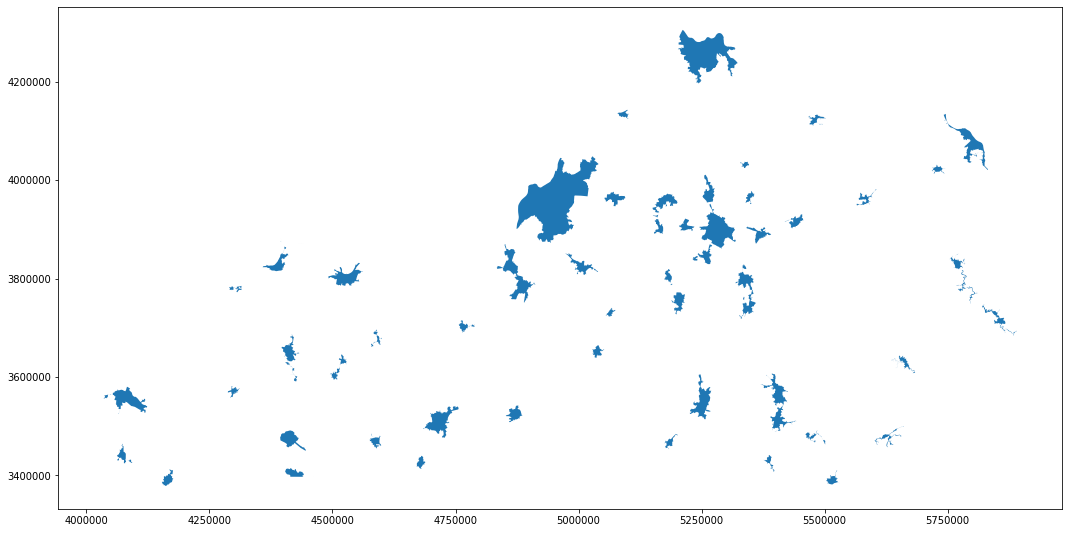

In [18]:
Urban.plot(figsize=(18,18))

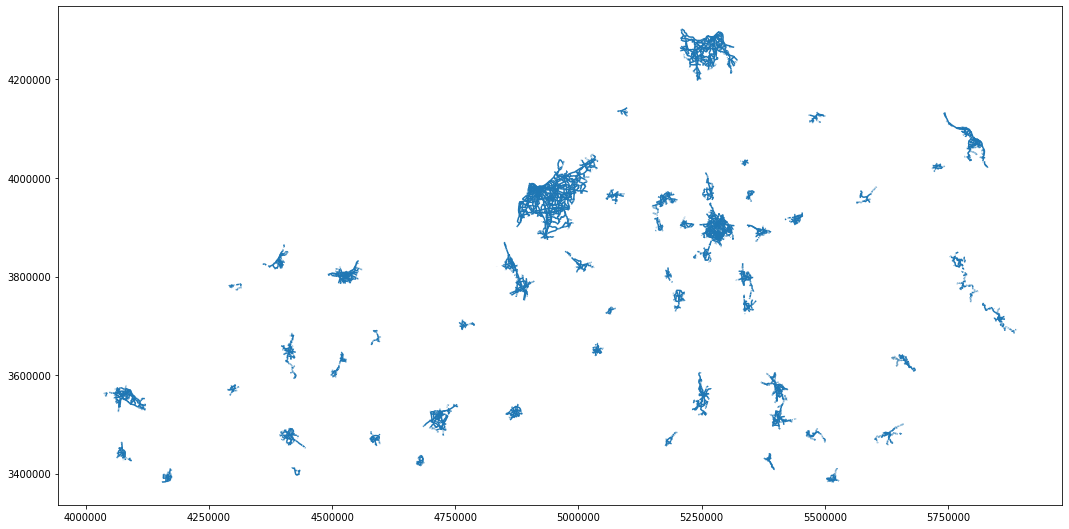

In [19]:
Urban_LN.plot(figsize=(18,18))

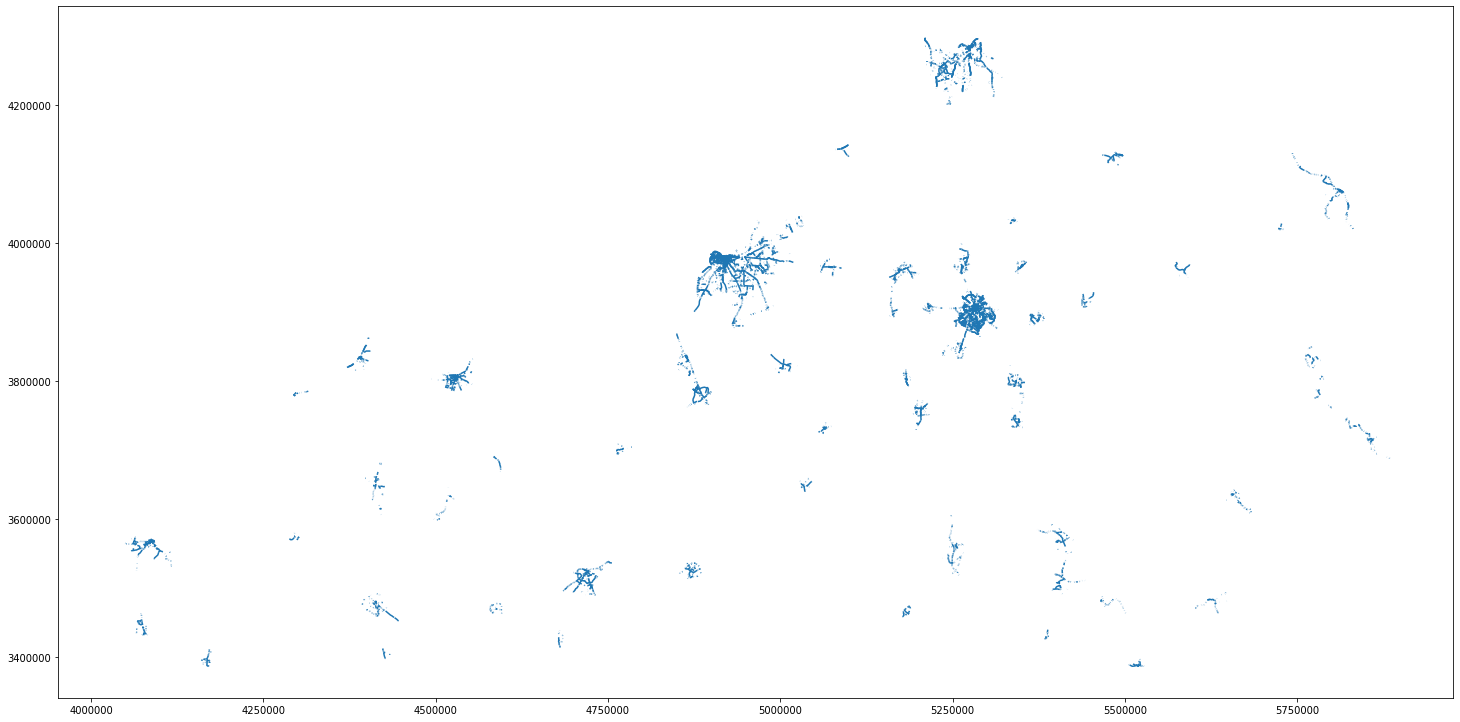

In [21]:
Urban_AL.plot(figsize=(25,25))